In [12]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import HumanMessage,SystemMessage
from langchain_ollama import ChatOllama
model=ChatOllama(model="llama3.1:8b")
agent=create_agent(model,checkpointer=InMemorySaver(),middleware=[SummarizationMiddleware(model=model,trigger=("messages",10),keep=("messages",4))])

In [13]:
# run thread id
config={"configurable":{"thread_id":"test-1"}}

questions=[
    "What is 2+2?",
    "What is 10*5?",
    "What is 100/4?",
    "What is 15-7?"
]

for q in questions:
    response=agent.invoke({"messages":[HumanMessage(content=q)]},config=config)
    print(response['messages'][0].content)
    print(len(response['messages'][0].content))

What is 2+2?
12
What is 2+2?
12
What is 2+2?
12
What is 2+2?
12


### token size

In [14]:
from langchain_core.tools import tool

In [15]:
@tool
def predict_price(token:float)->float:
    """Predict the price of blockchain tokens"""
    return f"{token} price >2350$"


agent=create_agent(model=model,tools=[predict_price],checkpointer=InMemorySaver(),middleware=[SummarizationMiddleware(
    model=model,trigger=("tokens",1000),keep=("tokens",200)
)])
config={"configurable":{"thread_id":"test-1"}}

def count_tokens(messages):
    total_chars=sum(len(str(m.content)) for m in messages)
    return total_chars//4

In [16]:
tokens=["BTC","ETH","SOL","XRP"]

for token in tokens:
    response=agent.invoke(
        {"messages":[HumanMessage(content=f"predict token in {token}")]},
        config=config
    )
    tokens_=count_tokens(response["messages"])
    print(f"{token}:~{tokens_} tokens,{len(response["messages"])} messages")
    print(f"{(response["messages"])}")

BTC:~133 tokens,4 messages
[HumanMessage(content='predict token in BTC', additional_kwargs={}, response_metadata={}, id='b871c355-e05a-435f-9884-64965f51952a'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1:8b', 'created_at': '2026-02-16T11:42:12.227848888Z', 'done': True, 'done_reason': 'stop', 'total_duration': 477693457, 'load_duration': 101643054, 'prompt_eval_count': 148, 'prompt_eval_duration': 91500484, 'eval_count': 17, 'eval_duration': 268760197, 'logprobs': None, 'model_name': 'llama3.1:8b', 'model_provider': 'ollama'}, id='lc_run--019c6642-1125-7892-b728-39440aa1ce05-0', tool_calls=[{'name': 'predict_price', 'args': {'token': 'BTC'}, 'id': '7c51aead-8cc5-40d8-9e40-1ddc3b477b48', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 148, 'output_tokens': 17, 'total_tokens': 165}), ToolMessage(content="Error invoking tool 'predict_price' with kwargs {'token': 'BTC'} with error:\n token: Input should be a valid number,

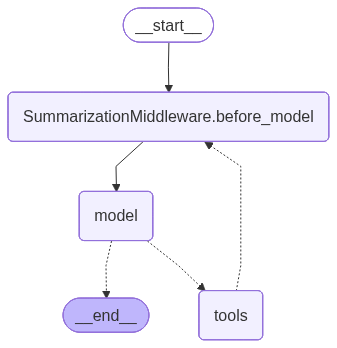

In [17]:
agent